# Time Series Visualizer Project

This notebook shows an analysis and visualisation of a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

## Preparing the tools

Pandas, Matplotlib, Seaborn and NumPy for data analysis and manipulation.

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import calendar

## Import data

The dataset was retrieved from [FreeCodeCamp](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer), downloaded in csv format and then imported into the project.

In [62]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [63]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


## Reorganisation and modification of data

In [64]:
# Import data (parse dates, set index column to 'date'.)

df = pd.read_csv('fcc-forum-pageviews.csv', 
                 parse_dates=True, 
                 index_col=[0])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [65]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
            (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Line Plot of the forum page views from 5/2016 to 12/2019

In [66]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart. 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

def draw_line_plot(): 
    fig, ax = plt.subplots(figsize=(20, 6))
    df.plot(xlabel = "Date", 
            ylabel = "Page Views", 
            title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", 
            ax = ax, 
            c = 'r')
    fig.savefig('line_plot.png')

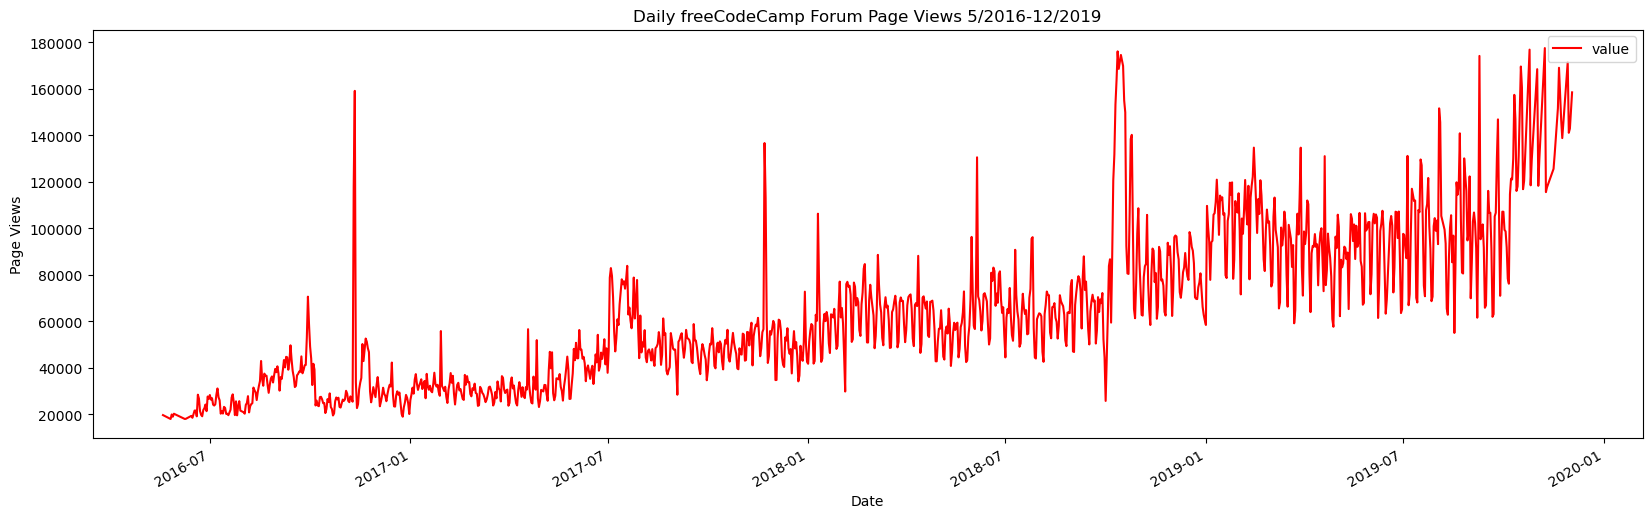

In [67]:
draw_line_plot()

## Bar Plot with the average daily page views for each month grouped by year

In [70]:
# Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot(): 
# Copy and modify data for monthly bar plot
    df_bar = df.groupby(by=[df.index.year, df.index.month], 
                        sort=True).mean().rename_axis(index = ["Year","Month"])
# Draw bar plots (using Matplotlib)
    fig, ax = plt.subplots(figsize=(8, 7))
    df_bar.unstack().plot.bar(xlabel = "Years", 
                              ylabel = "Average Page Views", 
                              ax = ax)
    ax.legend(list(calendar.month_name)[1:], title = "Months")
    fig.savefig('bar_plot.png')

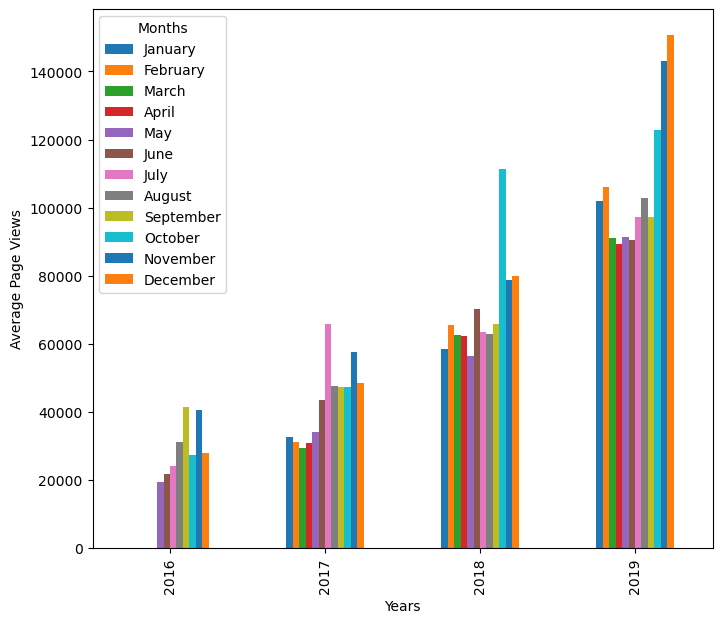

In [71]:
draw_bar_plot()

## Box Plots with the distribution of page views in a year and months and their comparison.

In [72]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots. 
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) and of the second Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

def draw_box_plot():
# Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
# Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(ncols = 2, 
                                   figsize = (20,6))
    sns.boxplot(data = df_box, 
                x = "year", 
                y = "value", 
                ax = ax1)
    ax1.set(xlabel = "Year", 
            ylabel = "Page Views", 
            title = "Year-wise Box Plot (Trend)")
    sns.boxplot(data = df_box, 
                x = "month", 
                y = "value", 
                ax = ax2, 
                order = list(calendar.month_abbr)[1:])
    ax2.set(xlabel = "Month", 
            ylabel = "Page Views", 
            title = "Month-wise Box Plot (Seasonality)")
    fig.savefig('box_plot.png')

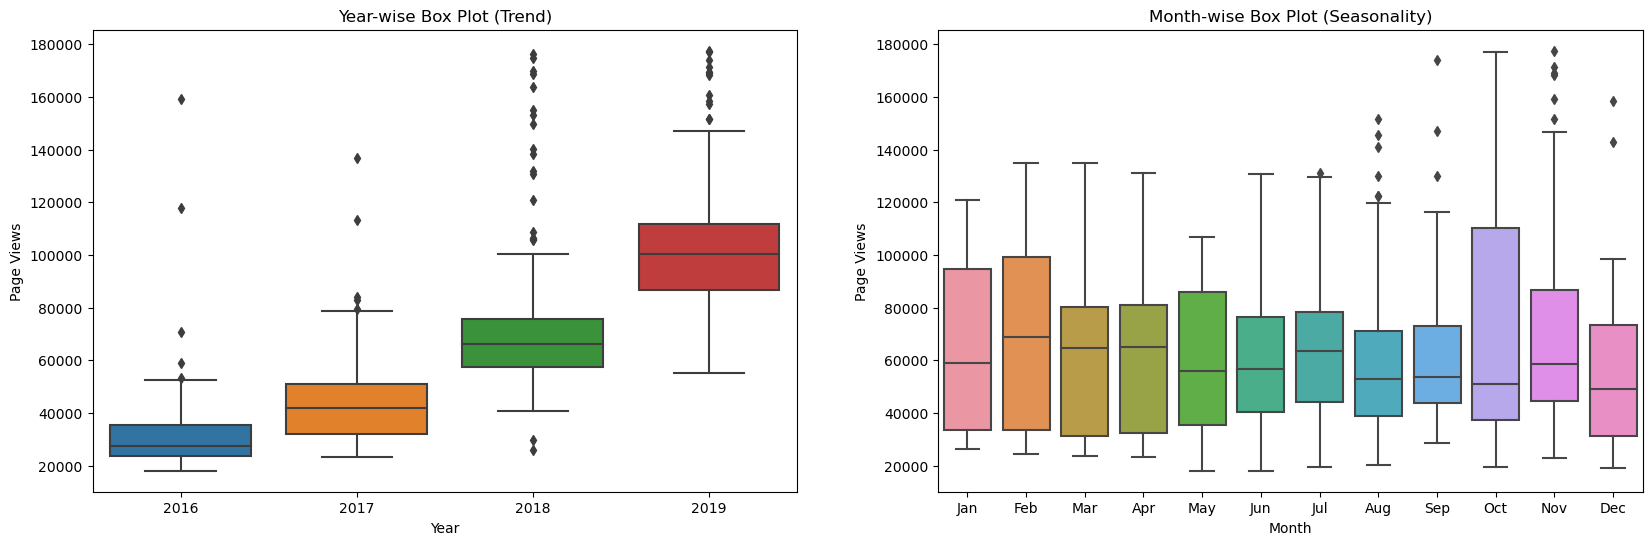

In [73]:
draw_box_plot()